**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

Project 3: Linear regression

Polynomial regression

In [87]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import data
import linear_regression

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Task 3: Polynomial Regression

We have been creating linear regression fits of form $y =c_0 + c_1x_1 + c_2x_2 + \ldots$, where $x_i$ are independent variables (columns of $A$) and $c_i$ are corresponding coefficients in $c$. However, this equation only allows us to fit data with a line/plane. This may not be the best choice for all datasets.

In this task, you will generalize the linear regression model form to include higher-degree (>1) polynomial terms and explore how this may improve fits to complex data. For example, assume we're doing a simple linear regression with independent variable $x_1$ and dependent variable $y$. A linear regression that fits data with a quadratic shape has the form$$y = c_0 + c_1x_1 + c_2x_1^2$$

Complete the following steps to add support for polynomial regression in your `LinearRegression` class.

### 3a) Build the polynomial matrix of the independent variable

The polynomial matrix contains the independent variable raised to a different power in each column. For example, if $A$ originally has a column vector for the independent variable $\vec{x_1}$ ($A = [\vec{x_1}]$) and we wanted to make the above quadratic model, we would append $x_1^2$ ($A = [\vec{x_1}, \vec{x_1^2}]$).

**TODO:**
Implement and test `LinearRegression::make_polynomial_matrix` (*helper method*) that takes care of raising the independent variable samples to different powers.

##### Test `make_polynomial_matrix`

In [88]:
test_A = np.r_[1:10].reshape((9, 1))
test_p = 3

# Test cubic
lin_reg = linear_regression.LinearRegression(data.Data())
print(f'Your polynomial matrix:\n{lin_reg.make_polynomial_matrix(test_A, 3)}')

true_mat = '''
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
'''
print('It should look like:\n', true_mat)

Your polynomial matrix:
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]
It should look like:
 
[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]
 [  6.  36. 216.]
 [  7.  49. 343.]
 [  8.  64. 512.]
 [  9.  81. 729.]]



### 3b) Add support for polynomial regression

This can be performed in 3 steps:


1. Implement the `LinearRegression::polynomial_regression` method to perform the polynomial regression (*alternate option: you may instead update your `linear_regression` method. If you decide to go this route, add a keyword argument for the polynomial degree with a default value of 1 to preserve compatability with regular linear regression.*).
2. Update `LinearRegression::predict`: Run `make_polynomial_matrix` on the "A" matrix that enters into the computation $y = Ac$ if `self.p > 1`.
3. Add support for plotting polynomials in `LinearRegression::scatter` by generalizing the plotted regression line to a regression polynomial if `self.p > 1`:
    - Getting your polynomial "x" values: Run `make_polynomial_matrix` on your evenly-spaced line sample points. To get the shapes to work out, you may need to add a trailing singleton dimension to your "x" sample points. For example, if you have 1000 "x" sample points, make the shape `(1000, 1)` rather than `(1000,)`.
    - Getting your polynomial "y" values: Use matrix multiplication with your polynomial regression model slopes and/or intercepts.

*There is no explicit test code here — visualizing the fit in the next subtask will help you debug!*

### 3c) Run a polynomial regression

In this subtask, you will debug your polynomial regression implementation and experiment fitting some data with it.

#### Test: Polynomial regression with linear model ($p = 1$)

- In the cell below, fit the `poly_data.csv` dataset using polynomial regression where the polynomial degree $p = 1$.
- Use `scatter` to plot the results.
- Print out the mean sum of squares error.

The plot created by running the below cell should "look right" to you.

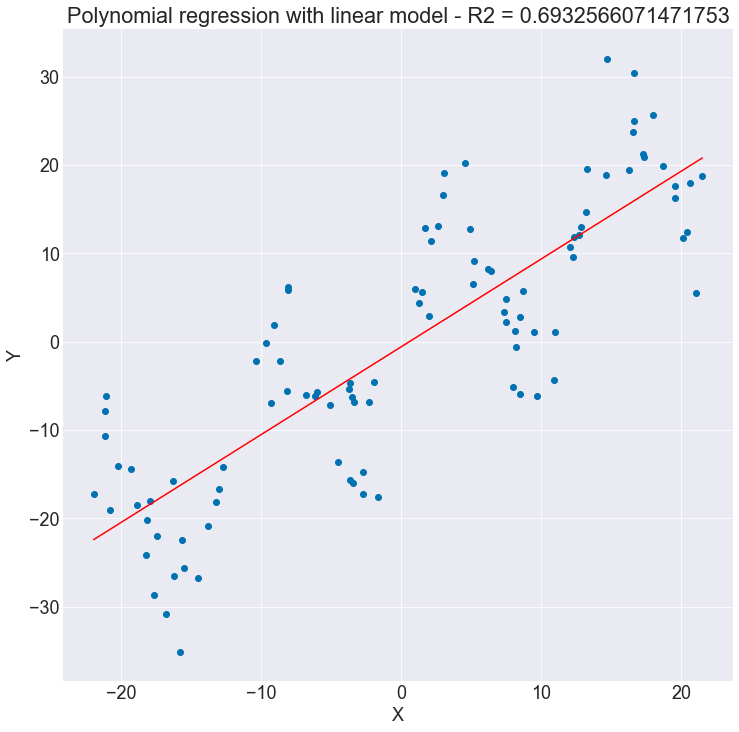

Mean SSE:  71.81095284569933


In [89]:
poly_filename = 'data/poly_data.csv'
poly_data = data.Data(poly_filename)
poly_reg = linear_regression.LinearRegression(poly_data)
poly_reg.linear_regression('X', 'Y', 1)
poly_reg.scatter('X', 'Y', 'Polynomial regression with linear model')
poly_reg.show()
print("Mean SSE: ", poly_reg.m_sse)

#### Test: polynomial regression with high degree polynomials

Repeat the steps from the $p = 1$ test above in the cell below, but this time try $p = 7$. 

*Your regression fit should not be a line!*

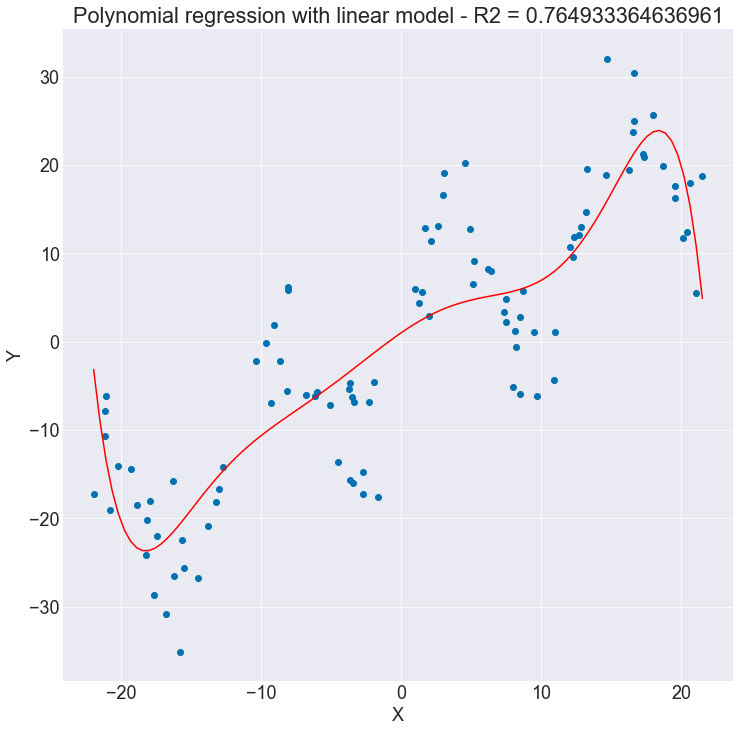

Mean SSE:  55.03088073278101


In [90]:
poly_reg.linear_regression('X', 'Y', 7)
poly_reg.scatter('X', 'Y', 'Polynomial regression with linear model')
poly_reg.show()
print("Mean SSE: ", poly_reg.m_sse)

**Question 5:** Describe the fit compared to `p=1` — is it better or worse? Why?

**Question 6:** Describe what happens visually and in terms of the $R^2$ and MSE values as you experiment with the polynomial degree between 1 and 7. Please include graphs to back up your argument.

**Answer 5:** In this case p=7 fits better than p=1, because the trendline aligns well with the shape of the data, and it also has a higher R2, showing it's more matched.

**Answer 6:** Visually, increasing the degree makes the trend has more turns and fits better for the change of data. The R2 becomes higher, and MSE becomes lower. (Graph below is p=4, together with the upper graph of p=1 and p=7, we could see the trend.)

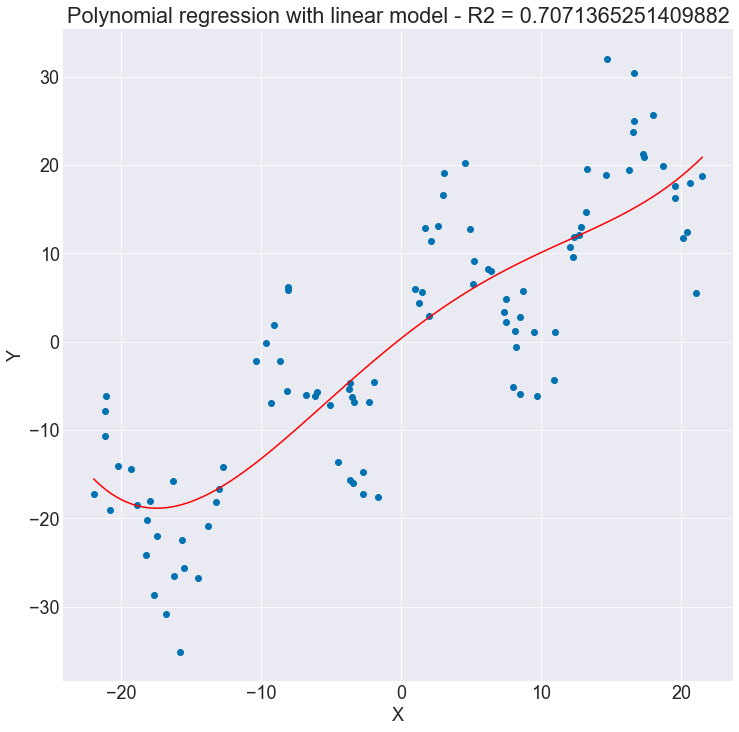

Mean SSE:  68.56155885782587


In [91]:
poly_reg.linear_regression('X', 'Y', 4)
poly_reg.scatter('X', 'Y', 'Polynomial regression with linear model')
poly_reg.show()
print("Mean SSE: ", poly_reg.m_sse)


## Task 4: Overfitting

In this subtask, you will experiment with how polynomial regression generalize to data not used to fit the regression model.

### 4a) Create fit and validation sets

The `poly_data.csv` dataset has 100 samples ($N=100$). In the cell below, split these samples into two separate "datasets" and create 2 `Data` objects representing:
- The first 50% of samples will be used to fit the regression model (i.e. run linear regression on these samples). We will call this the **fit set** (data used to fit the regression).
- The second 50% of samples will be set aside and only used to check how well the fitted regression generalizes to new data. We will call this the **validation set**.

*Hint: There is a helpful `Data` method for paring down a dataset into a certain range of samples.*

In [92]:
poly_filename = 'data/poly_data.csv'
poly_data_fit = data.Data(poly_filename)
poly_data_val = data.Data(poly_filename)
poly_data_fit.limit_samples(0, 50)
poly_data_val.limit_samples(50, 100)

print(poly_data_fit)
print(poly_data_val)

-------------------------------
Headers:
X  Y
-------------------------------
Showing first 5/50 rows. 
2.147   11.382
9.465   1.034
4.52   20.251
1.974   2.89
-3.358   -6.809
-------------------------------

-------------------------------
Headers:
X  Y
-------------------------------
Showing first 5/50 rows. 
-3.65   -4.658
9.69   -6.107
-21.986   -17.271
-8.694   -2.22
-15.536   -25.608
-------------------------------



Printing the `Data` object storing the fit set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    2.147	11.382
    9.465	1.034
    4.52	20.251
    1.974	2.89
    -3.358	-6.809

    -------------------------------

Printing the `Data` object storing the validation set should yield:

    -------------------------------
    data/polydata.csv (50x2)
    Headers:
    X	Y
    Types:
    numeric	numeric
    -------------------------------
    Showing first 5/50 rows.
    -3.65	-4.658
    9.69	-6.107
    -21.986	-17.271
    -8.694	-2.22
    -15.536	-25.608

    -------------------------------

### 4b) Check fit generalization on validation set

Here is the process for checking how well your fitted linear regression model generalizes to the validation data:
1. Create `Data` objects for both the fit and validation data sets (*as you have already done*).
2. Run linear regression on the fit set.
3. Create a new `LinearRegression` object associated with the validation data.
4. Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set `LinearRegression` object.
5. Create a scatterplot by calling `scatter` to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
6. Calculate and report fit statistics (e.g. MSSE, $R^2$).

Before doing this, implement the following methods to help you copy over the fitted slope, intercept and other data from your fit set `LinearRegression` object:

- `get_fitted_slope`: return the fitted regression slopes.
- `get_fitted_intercept`: return the fitted regression intercept.
- `initialize(ind_vars, dep_var, slope, intercept, p)`: set fields based on passed in parameter values.

#### Check overfitting with $p = 7$ polynomial regression model

In the cell below:

1. Fit a polynomial regression model with $p = 7$ on the fit set.
2. Create 2 scatter plots:
    - Showing the fit set and regression curve fitted to it.
    - Showing the validation set and regression curve that uses the fitted coefficients to the **fit set**.
3. Compute and print the MSSE for both the fit and validation sets.

Use the 6 step process above to guide you through the setup.

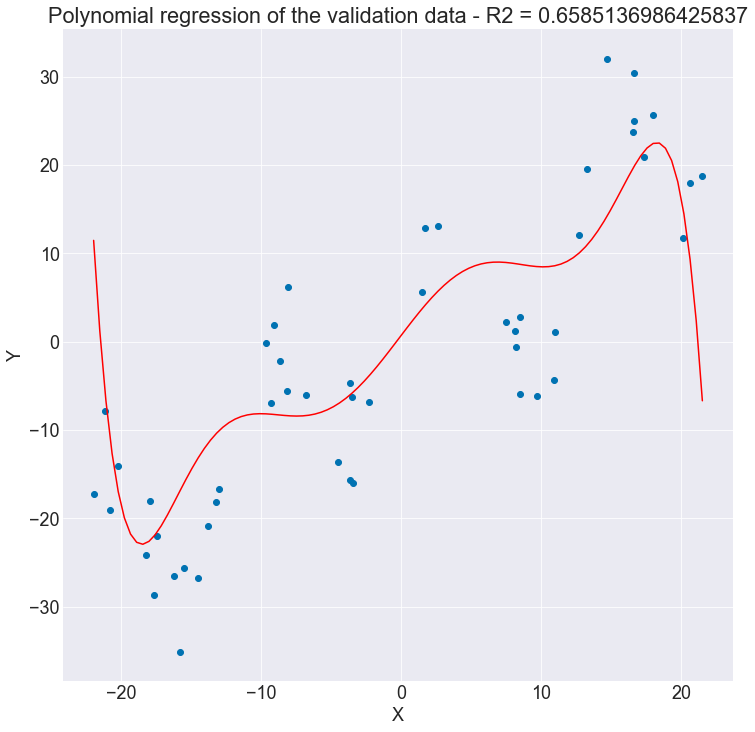

Mean SSE of training:  38.30258184051852 
R2 of training:  0.7815173867606514 

Mean SSE of validation:  96.45877456854063 
R2 of validation:  0.6585136986425837


In [93]:
# 1.Create Data objects for both the fit and validation data sets (as you have already done).
p = 7

# 2.Run linear regression on the fit set.
poly_fit_reg = linear_regression.LinearRegression(poly_data_fit)
poly_fit_reg.linear_regression('X', 'Y', p)

# 3.Create a new LinearRegression object associated with the validation data.
poly_val_reg = linear_regression.LinearRegression(poly_data_val)

# 4.Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set LinearRegression object.
poly_val_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p)

# 5.Create a scatterplot by calling scatter to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
poly_val_reg.scatter('X', 'Y', 'Polynomial regression of the validation data')
poly_val_reg.show()

# 6.Calculate and report fit statistics (e.g. MSSE, R2)
print("Mean SSE of training: ", poly_fit_reg.m_sse, "\nR2 of training: ", poly_fit_reg.R2, "\n")
print("Mean SSE of validation: ", poly_val_reg.m_sse, "\nR2 of validation: ", poly_val_reg.R2)

**Question 7:** Describe how the fitted coefficients obtained for the fit set generalize to the validation set. Do they do a good or bad job? Why?

**Question 8:** Does the generalization improve or worsen for polynomial degrees < 7? Are Back up your observations with numbers (e.g. MSSE, $R^2$).

**Question 9:** Are there any values/ranges of polynomial degrees that generalize acceptably to the validation set? Why do you think so?

**Question 10:** What happens when you increase the polynomial degree above 7, in the range $7-13$? Why do you think this happens? Back up your observations with numbers (e.g. MSSE, $R^2$).

In [94]:
for p in range(1,14):

    poly_fit_reg = linear_regression.LinearRegression(poly_data_fit)
    poly_fit_reg.linear_regression('X', 'Y', p)
    poly_val_reg = linear_regression.LinearRegression(poly_data_val)
    poly_val_reg.initialize(['X'], 'Y', poly_fit_reg.get_fitted_slope(), poly_fit_reg.get_fitted_intercept(), p)

    print("p =", p)
    print("Mean SSE - training: ", poly_fit_reg.m_sse, "\nR2 - training: ", poly_fit_reg.R2)
    print("Mean SSE - validation: ", poly_val_reg.m_sse, "\nR2 - validation: ", poly_val_reg.R2)
    print("Delta MSSE: ", poly_val_reg.m_sse-poly_fit_reg.m_sse, "\nDelta R2: ", poly_val_reg.R2-poly_fit_reg.R2, "\n")

p = 1
Mean SSE - training:  59.59921097570393 
R2 - training:  0.6600388084752988
Mean SSE - validation:  88.58467771864787 
R2 - validation:  0.6863898169307059
Delta MSSE:  28.985466742943935 
Delta R2:  0.026351008455407054 

p = 2
Mean SSE - training:  59.40840801582888 
R2 - training:  0.6611271719036671
Mean SSE - validation:  89.27378847228445 
R2 - validation:  0.6839502059825308
Delta MSSE:  29.86538045645557 
Delta R2:  0.022823034078863658 

p = 3
Mean SSE - training:  53.48828745123431 
R2 - training:  0.6948962639463439
Mean SSE - validation:  93.01736764114841 
R2 - validation:  0.6706970726109716
Delta MSSE:  39.529080189914104 
Delta R2:  -0.024199191335372294 

p = 4
Mean SSE - training:  52.622523882560834 
R2 - training:  0.6998346852704935
Mean SSE - validation:  91.37791686898116 
R2 - validation:  0.6765011063336595
Delta MSSE:  38.755392986420325 
Delta R2:  -0.023333578936834076 

p = 5
Mean SSE - training:  49.80778219474408 
R2 - training:  0.7158903162488051


**Answer 7:** Since the validation set is another half of the data randomly drawed from the same dataset with the fitting set, the coefficients of the fitting set should fit the validation set as well if the model is appropriate. This method - splitting data into training and validation sets - does a good job since it can detect overfitting.

**Answer 8:** The generalization worsens at first and then betters. I've calculated above delta MSSE and delta R2 values. Delta MSSE shows a larger then smaller trend, when larger is better, worsens firstly and betters. Delta R2 shows a smaller then larger trend, when smaller is better, worsens firstly and betters too. 

**Answer 9:** I think when p = 5 or 6 the validation set is acceptable. Because when p = 5 or 6, the R2 of both the fitting set and the validation set are close and pretty high, both about 0.72, and the MSSE is compartively low. The MSSE is small and R2 close to 1 for both the training set and the testing set.

**Answer 10:** When increasing the polynomial degree above 7, the fitness fluctuates and the regression line gets weird. Both MSSE and R2 of the validation set fluactuates, but generally MSSE increases and R2 decreases when increasing the polynomial degree to 13, meaning the regression fits less. In this case, the MSSE is small and R2 close to 1 for just the training set, but not the validation set. This happens because of the overfitting caused by too high the polynomial degree, since higher polynomial degree doesn't necessarily lead to better fit.

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

**Reminder:** Give credit to all sources, including anyone that you consulted.

### 1. Your own data

- Run linear regression on datasets that interest you. Identify your hypotheses about the association between variables and test them out. Make plots and report all relevant metrics fit.

**This dataset records the World Happiness Report 2016. The happiness scores and Economy (GDP per Capita) for each country use data from the Gallup World Poll.**

**Hypothesis: the happiness score a country gains is positivly correlated with its GDP per capita.**


Test of regression: linear regression


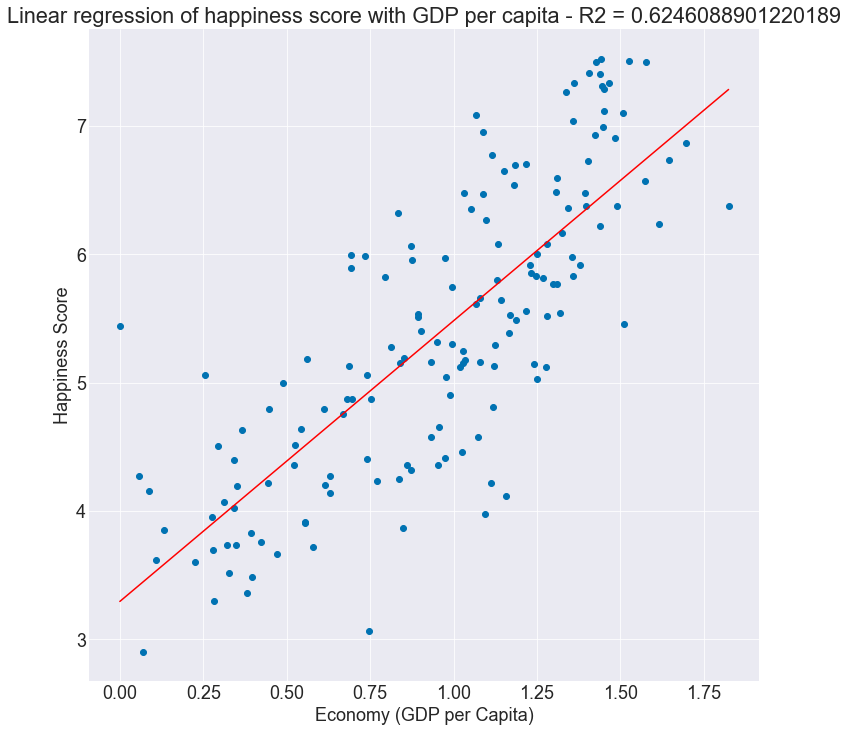

Mean SSE:  0.4861751800515043


In [95]:
print("\nTest of regression: linear regression")
happiness_filename = 'data/happiness_2016.csv'
happiness_data = data.Data(happiness_filename)
happiness_reg = linear_regression.LinearRegression(happiness_data)
happiness_reg.linear_regression(['Economy (GDP per Capita)'], 'Happiness Score', 1)
happiness_reg.scatter('Economy (GDP per Capita)', 'Happiness Score', 'Linear regression of happiness score with GDP per capita')
happiness_reg.show()
print("Mean SSE: ", happiness_reg.m_sse)

**Based on the graph, the linear regression line, and relatively high R2 and low MSSE values, it is very likely that there is an positive relationship between a country's happiness score and its GDP per capita. This is to say that, any country having higher GDP per capita, have better economy, are more likely to raise happier people compared to those countries with worse economy.**

### 2. Linear regression algorithm comparison

- Research and implement other the linear regression solver methods (e.g. normal equations).
- Run and compare how well they do on a dataset of your choice.
- Research and implement matrix condition number. Find a dataset with a poor matrix condition number and then compare the regression methods. Which does best and why?

**Hypothesis: the happiness score a country gains is positively associated with its economy (GDP per capita).**

(Reference Used for normal equation: https://stackoverflow.com/questions/46586520/normal-equation-implementation-in-python-numpy/46590409)


Test of regression: Normal equation


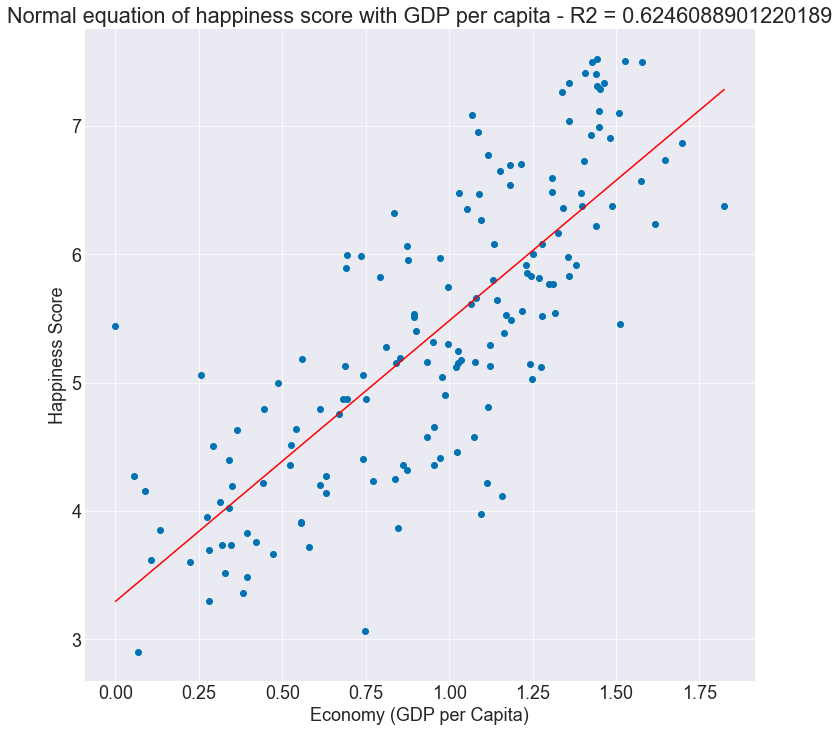

Linear regression R2:  0.6246088901220189  <-> Normal equation R2:  0.6246088901220189
Linear regression Mean SSE:  0.4861751800515043  <-> Normal equation Mean SSE:  0.4861751800515043


In [96]:
print("\nTest of regression: Normal equation")
happiness_reg_normal = linear_regression.LinearRegression(happiness_data)
happiness_reg_normal.normal_equation(['Economy (GDP per Capita)'], 'Happiness Score')
happiness_reg_normal.scatter('Economy (GDP per Capita)', 'Happiness Score', 'Normal equation of happiness score with GDP per capita')
happiness_reg_normal.show()

print("Linear regression R2: ", happiness_reg.R2, " <-> Normal equation R2: ", happiness_reg_normal.R2)
print("Linear regression Mean SSE: ", happiness_reg.m_sse, " <-> Normal equation Mean SSE: ", happiness_reg_normal.m_sse)

**In this case, the models created by linear regression and normal equation are the same good, as the delta is the same, as well as R2 and MSSE value are the same.**

**Therefore, we could draw the same conclusion as the previous part, that is: any country having higher GDP per capita, have better economy, are more likely to raise happier people compared to those countries with worse economy.**

### 3. Confidence intervals or other kinds of error bars on linear regression plots

- Add the option to plot 95% confidence intervals on the linear regression predictions in your plot functions (e.g. `scatter`).

(Reference Used for normal equation: https://stackoverflow.com/questions/27164114/show-confidence-limits-and-prediction-limits-in-scatter-plot)

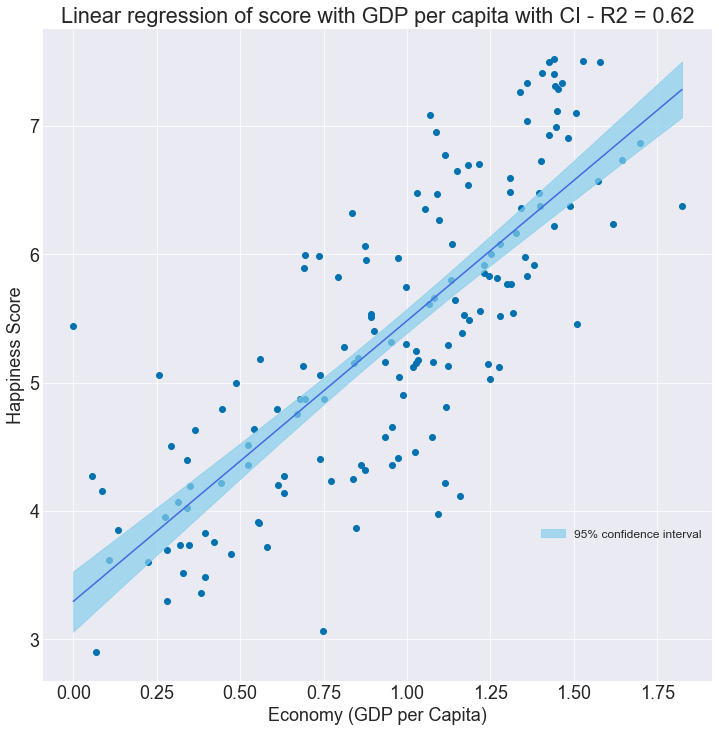

In [97]:
happiness_reg.ci_scatter('Economy (GDP per Capita)', 'Happiness Score', 'Linear regression of score with GDP per capita with CI')
happiness_reg.show()

### 4. Overfitting

- Run polynomial regression on other datasets. What degree polynomial works well? When do you overfit?

In [98]:
happiness_data_fit = data.Data(happiness_filename)
happiness_data_val = data.Data(happiness_filename)
#Randomize the data before dividing into two sets
happiness_data_fit.radomize_data()
happiness_data_val.radomize_data()
happiness_data_fit.limit_samples(0, 78)
happiness_data_val.limit_samples(78, 156)

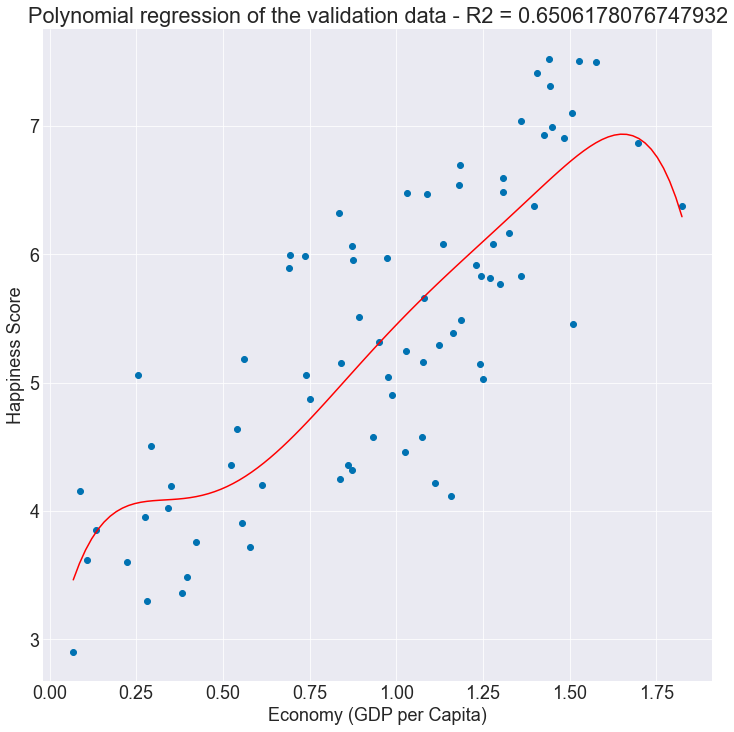

Mean SSE of training:  0.35901120367888634 
Mean SSE of validation:  0.47998588903541245 

R2 of training:  0.7047747133420239 
R2 of validation:  0.6506178076747932


In [99]:
# 1.Create Data objects for both the fit and validation data sets (as you have already done).
p = 6

# 2.Run linear regression on the fit set.
happiness_fit_reg = linear_regression.LinearRegression(happiness_data_fit)
happiness_fit_reg.linear_regression(['Economy (GDP per Capita)'], 'Happiness Score', p)

# 3.Create a new LinearRegression object associated with the validation data.
happiness_val_reg = linear_regression.LinearRegression(happiness_data_val)

# 4.Copy over the fitted slope and intercept coefficients associated with the fit set to the validation set LinearRegression object.
happiness_val_reg.initialize(['Economy (GDP per Capita)'], 'Happiness Score', happiness_fit_reg.get_fitted_slope(), happiness_fit_reg.get_fitted_intercept(), p)

# 5.Create a scatterplot by calling scatter to show the validation data and the regression curve that uses the coefficients fitted on the fit dataset (copied over in Step 4).
happiness_val_reg.scatter('Economy (GDP per Capita)', 'Happiness Score', 'Polynomial regression of the validation data')
happiness_val_reg.show()

# 6.Calculate and report fit statistics (e.g. MSSE, R2)
print("Mean SSE of training: ", happiness_fit_reg.m_sse, "\nMean SSE of validation: ", happiness_val_reg.m_sse, '\n')
print("R2 of training: ", happiness_fit_reg.R2, "\nR2 of validation: ", happiness_val_reg.R2)

**After testing, in this case, I discovered the degree polynomial of 7 works well, while a degree polynomial of above 10 could cause overfit.**

**This polynomial regression also shows that, in general trend, any country having higher GDP per capita, have better economy, are more likely to raise happier people compared to those countries with worse economy.**

### 5. Stepwise linear regression

- Implement the stepwise linear regression discussed in class where you add variables to the regression model one-by-one in a greedy fashion: each variable added out of the available ones not already entered in the regression should result in the largest increase in the adjusted $R^2$ value on the validation data.